# WALMART SALES ANALYSIS
###### *A clean, step-by-step Python analysis to explore sales performance using grouping, visualization, and segmentation.*

## 1. Import Libraries and Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# optional code block below

import os # to check/change the working directory on my PC
# Confirm current working directory
print(os.getcwd())
# to change the working directory on my PC
os.chdir("C:/Users/oyeor/Documents/GitHub/walmart-sales-dashboard")

C:\Users\oyeor\Desktop\JUPYTYER


In [2]:
# Load the Excel file
file_path = "data/processed/walmart_workbook.xlsx"
df = pd.read_excel(file_path, sheet_name = "merged_clean")

In [3]:
# view the data / structure 
display(df.shape, df.head())

(421570, 16)

,Store,Dept,Date,Weekly_Sales,Type,Size,StoreDateKey,Temperature,Fuel_Price,MarkDown1,CPI,Unemployment,IsHoliday_train,IsHoliday_feat,Holiday_Match_Check,mismatch_count
0,1,1,2010-02-05,24924.50,A,151315,01-2010-02-05,42.31,2.572,NaN,211.096358,8.106,False,False,Match,0.0
1,1,1,2010-02-12,46039.49,A,151315,01-2010-02-12,38.51,2.548,NaN,211.242170,8.106,True,True,Match,NaN
2,1,1,2010-02-19,41595.55,A,151315,01-2010-02-19,39.93,2.514,NaN,211.289143,8.106,False,False,Match,NaN
3,1,1,2010-02-26,19403.54,A,151315,01-2010-02-26,46.63,2.561,NaN,211.319643,8.106,False,False,Match,NaN
4,1,1,2010-03-05,21827.90,A,151315,01-2010-03-05,46.50,2.625,NaN,211.350143,8.106,False,False,Match,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Store                421570 non-null  int64         
 1   Dept                 421570 non-null  int64         
 2   Date                 421570 non-null  datetime64[ns]
 3   Weekly_Sales         421570 non-null  float64       
 4   Type                 421570 non-null  object        
 5   Size                 421570 non-null  int64         
 6   StoreDateKey         421570 non-null  object        
 7   Temperature          421570 non-null  float64       
 8   Fuel_Price           421570 non-null  float64       
 9   MarkDown1            150681 non-null  float64       
 10  CPI                  421570 non-null  float64       
 11  Unemployment         421570 non-null  float64       
 12  IsHoliday_train      421570 non-null  bool          
 13  IsHoliday_feat

## 2.0. Business Analysis
#### *2.1. Monthly Sales Trend.* 
###### *Group sales by month, and identify peak seasons*

In [5]:
# create new columns for month name and number
df["Month"] = df["Date"].dt.month_name()
df["Month_Num"] = df["Date"].dt.month
df.head(1)

,Store,Dept,Date,Weekly_Sales,Type,Size,StoreDateKey,Temperature,Fuel_Price,MarkDown1,CPI,Unemployment,IsHoliday_train,IsHoliday_feat,Holiday_Match_Check,mismatch_count,Month,Month_Num
0,1,1,2010-02-05,24924.5,A,151315,01-2010-02-05,42.31,2.572,NaN,211.096358,8.106,False,False,Match,0.0,February,2


In [6]:
monthly_sales = df.groupby(["Month_Num", "Month"])["Weekly_Sales"].sum().reset_index()
monthly_sales = monthly_sales.sort_values("Month_Num")
monthly_sales.rename(columns = {"Weekly_Sales":"Total Sales"}, inplace = True)
monthly_sales

,Month_Num,Month,Total Sales
0,1,January,3.325984e+08
1,2,February,5.687279e+08
2,3,March,5.927859e+08
3,4,April,6.468598e+08
4,5,May,5.571256e+08
5,6,June,6.226299e+08
6,7,July,6.500010e+08
7,8,August,6.130902e+08
8,9,September,5.787612e+08
9,10,October,5.847848e+08


###### **The above table mirrors the monthly pivot table made in the excel workbook.**

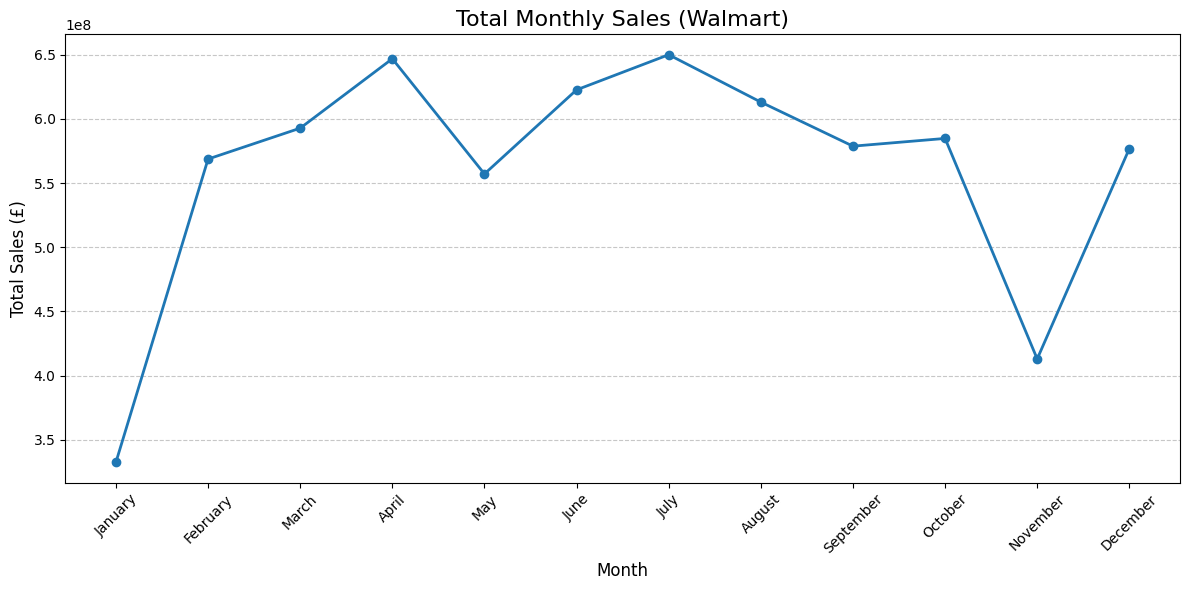

In [7]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize = (12,6))
plt.plot(monthly_sales["Month"], monthly_sales["Total Sales"], marker = "o", linewidth = 2)

# labels and title
plt.title("Total Monthly Sales (Walmart)", fontsize = 16)
plt.xlabel("Month", fontsize = 12)
plt.ylabel("Total Sales (£)", fontsize = 12)

# rotate x-axis for readability
plt.xticks(rotation = 45)

# Grid and layout 
plt.grid(axis = "y" , linestyle = "--", alpha = 0.7)
plt.tight_layout()

# show chart
plt.savefig("visuals/monthly_sales_trend.png")
plt.show()

###### **Insight : Sales spike significantly in Q4, possibly driven by holiday traffic.**

#### *2.2. Holiday vs. Non-Holiday weekly Sales.*
###### *Compare average weekly sales*

In [8]:
holiday_avg = df.groupby("IsHoliday_train")["Weekly_Sales"].mean().reset_index()
holiday_avg.rename(columns = {"Weekly_Sales" : "Average_Weekly_Sales"}, inplace = True)
holiday_avg

,IsHoliday_train,Average_Weekly_Sales
0,False,15901.445069
1,True,17035.823187


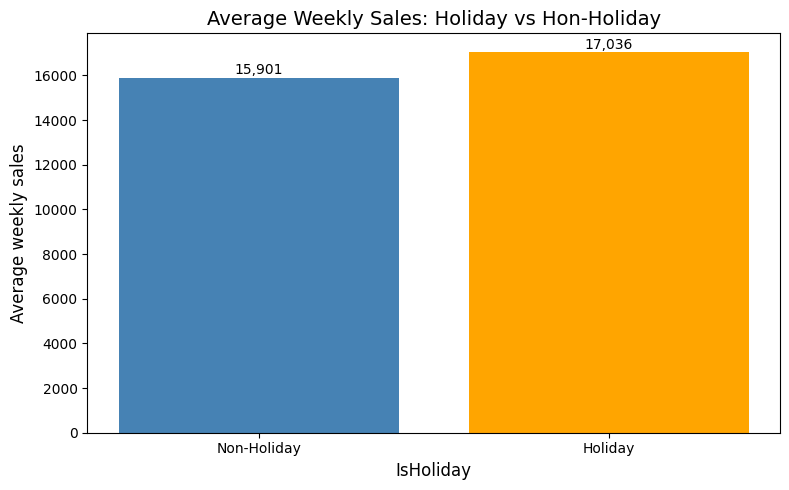

In [9]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize = (8,5))
plt.bar(
    holiday_avg["IsHoliday_train"].map({False : "Non-Holiday", True : "Holiday"}),
    holiday_avg["Average_Weekly_Sales"],
    color = ["steelblue","orange"]
)
# title and labels
plt.title("Average Weekly Sales: Holiday vs Hon-Holiday", fontsize = 14)
plt.xlabel("IsHoliday", fontsize = 12)
plt.ylabel("Average weekly sales", fontsize = 12)

# Add values on top of values
for i, val in enumerate(holiday_avg['Average_Weekly_Sales']):
    plt.text(i, val * 1.01, f"{val:,.0f}", ha='center', fontsize=10)
    
# show chart
plt.tight_layout()
plt.savefig("visuals/avg_weekly_sales_by_holiday.png")
plt.show()



###### **Insight : Holiday weeks showed ~ 7% revenue lift.**
###### **Also, holiday weeks generate more sales on average especially in November and December.**

#### *2.3. Sales by Store Type.*
###### *Group and visualize total sales by store type*

In [10]:
store_type_sales = df.groupby(["Type"])["Weekly_Sales"].sum().reset_index()
store_type_sales.rename(columns = {"Weekly_Sales":"Total Sales"}, inplace = True)
store_type_sales

,Type,Total Sales
0,A,4.331015e+09
1,B,2.000701e+09
2,C,4.055035e+08


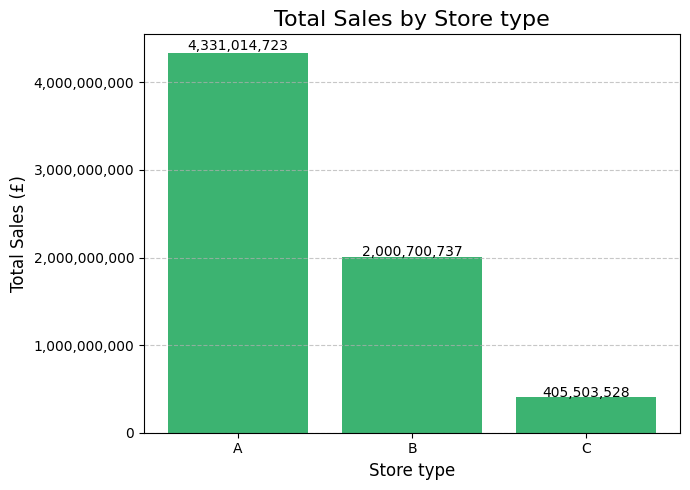

In [11]:
# set the plot
plt.figure(figsize = (7,5))
plt.bar(
    store_type_sales["Type"],
    store_type_sales["Total Sales"],
    color = ["mediumseagreen"]
)
# title and labels
plt.title("Total Sales by Store type", fontsize = 16)
plt.xlabel("Store type", fontsize = 12)
plt.ylabel("Total Sales (£)", fontsize = 12)

# gridstyle
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)

# Add labels on bars
for i, val in enumerate(store_type_sales["Total Sales"]):
    plt.text(i, val * 1.01, f"{val:,.0f}", ha = "center", fontsize = 10)

# Clean up scientific notation e.g 1e9 on top left of the plot (optional)
import matplotlib.ticker as ticker
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

# layout, save and show    
plt.tight_layout()
plt.savefig("visuals/total_sales_by_store.png")
plt.show()

###### **Insight : Store type A drives the most revenue across all locations.**

#### *2.4. Top ten Departments by Revenue.*
###### *Sort departments by total sales*

In [12]:
dept_sales = df.groupby("Dept")["Weekly_Sales"].sum().reset_index()
# rename the column 
dept_sales.rename(columns = {"Weekly_Sales" : "Total Sales"}, inplace = True)
# sort by highest sales
dept_sales = dept_sales.sort_values("Total Sales", ascending = False)

In [13]:
top_10_depts = dept_sales.head(10)
top_10_depts
# * optional code to reset the index
# * top_ten_depts.reset_index(drop = True, inplace = True)

,Dept,Total Sales
73,92,4.839433e+08
76,95,4.493202e+08
36,38,3.931181e+08
60,72,3.057252e+08
71,90,2.910685e+08
38,40,2.889360e+08
1,2,2.806112e+08
72,91,2.167817e+08
12,13,1.973216e+08
7,8,1.942808e+08


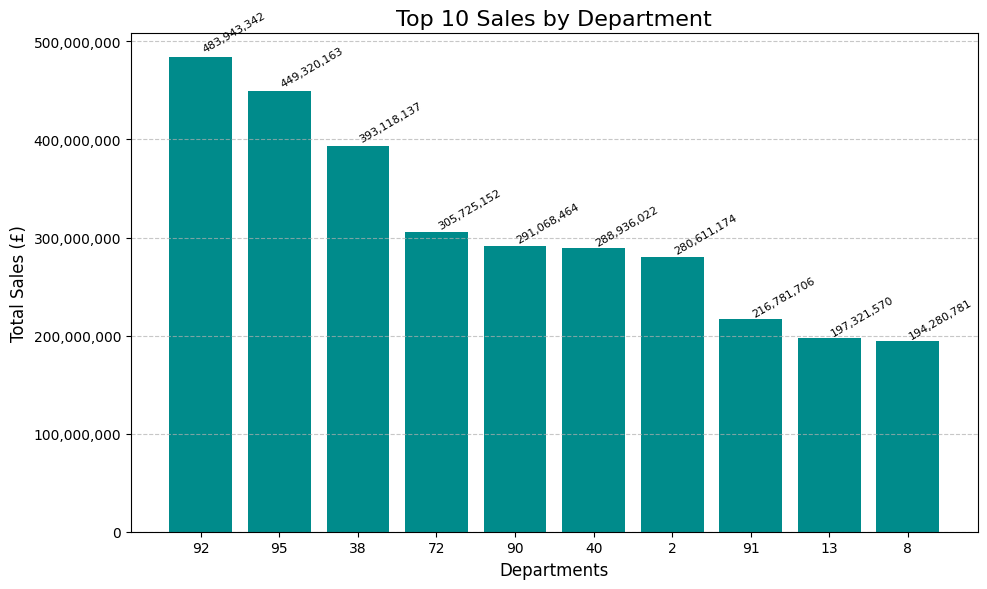

In [14]:
# plot
plt.figure(figsize = (10,6))
plt.bar(
    top_10_depts["Dept"].astype(str),
    top_10_depts["Total Sales"],
    color = "darkcyan"
)
# title, label and grid
plt.title("Top 10 Sales by Department", fontsize = 16)
plt.xlabel("Departments", fontsize = 12)
plt.ylabel("Total Sales (£)", fontsize = 12)
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)

# text on bar
for i, val in enumerate(top_10_depts["Total Sales"]):
    plt.text(i, val * 1.01 , f"{val:,.0f}", ha = "left", fontsize = 8, rotation = 30)

# Clean up scientific notation
import matplotlib.ticker as ticker
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

# layout, save and show
plt.tight_layout()
plt.savefig("visuals/top_10_dept_sales.png")
plt.show()

###### **Insight : A few departments consistently outperform others which is useful for inventory and promotions.**

# All insights are consistent with Excel results and now fully automated in Python. 